In [255]:
import pandas as pd
import numpy as np

### reading data from CSV files

In [271]:
toronto = pd.read_csv("../data/Toronto.csv", parse_dates=["Date"], index_col=False) # prevents errors due to malformed data
#toronto.set_index('Date', inplace=True)
montreal = pd.read_csv("../data/Montreal.csv", parse_dates=["Date"],index_col=False)
saopaulo = pd.read_csv("../data/SaoPaulo.csv", parse_dates=["Date"],index_col=False)

### Creates a dictionary, converts to dataframe, and saves it in a csv file

In [309]:
beatles = {"name" : ["john", "paul", "george", "ringo"], "role" : ["voice", "bass", "guitar", "drums"]}
beatles_df = pd.DataFrame(beatles)
beatles_df.to_csv('../data/beatles.csv', index = False, header = True)
beatles_df.describe

<bound method NDFrame.describe of      name    role
0    john   voice
1    paul    bass
2  george  guitar
3   ringo   drums>

In [272]:
toronto.describe()

Longitude      Latitude  Elevation  Max Temperature  Min Temperature
count  12987.000  1.298700e+04    12987.0     12987.000000     12987.000000
mean     -79.375  4.355590e+01       75.0        10.985102         5.457378
std        0.000  7.105701e-15        0.0         9.891268         9.497148
min      -79.375  4.355590e+01       75.0       -18.446000       -27.739000
25%      -79.375  4.355590e+01       75.0         3.029000        -1.224000
50%      -79.375  4.355590e+01       75.0        10.556000         5.423000
75%      -79.375  4.355590e+01       75.0        19.946500        13.508500
max      -79.375  4.355590e+01       75.0        36.991000        27.050000

### Dropping columns and shortening names

In [273]:
toronto = toronto[["Date", "Max Temperature", "Min Temperature"]] #drops useless columns
montreal = montreal[["Date", "Max Temperature", "Min Temperature"]]
saopaulo = saopaulo[["Date", "Max Temperature", "Min Temperature"]]

In [274]:
def shortnames(dataframe):
    dataframe.rename(columns={
        'Date': 'date',
        'Max Temperature': 'max', 
        'Min Temperature': 'min'
    }, inplace=True)
    return dataframe
toronto = shortnames(toronto)
montreal = shortnames(montreal)
saopaulo = shortnames(saopaulo)

In [291]:
toronto["max"].corr(montreal["max"])
#toronto["max"].corr(saopaulo["max"])
toronto["mean"] = (toronto["max"] + toronto["min"])/2

In [296]:
toronto.describe
#toronto.head
toronto.index

RangeIndex(start=0, stop=12987, step=1)

### selecting rows based on logic

In [260]:
range1979 = (toronto['date'] > '1979-1-1') & (toronto['date'] <= '1979-12-31')
range2013 = (toronto['date'] > '2013-1-1') & (toronto['date'] <= '2013-12-31')
rangeA = (toronto['date'] > '2000-1-1') & (toronto['date'] <= '2010-12-31')
rangeB = (montreal['date'] > '1997-1-1') & (montreal['date'] <= '2005-12-31')

#toronto1979 = toronto.loc[range1979]
toronto1979 = toronto.iloc[0:364]
toronto2013 = toronto.loc[range2013]
torontoA = toronto.loc[rangeA]
montrealB = montreal.loc[rangeB]


In [261]:
x = pd.merge(torontoA, montrealB, how ='outer', on="date")

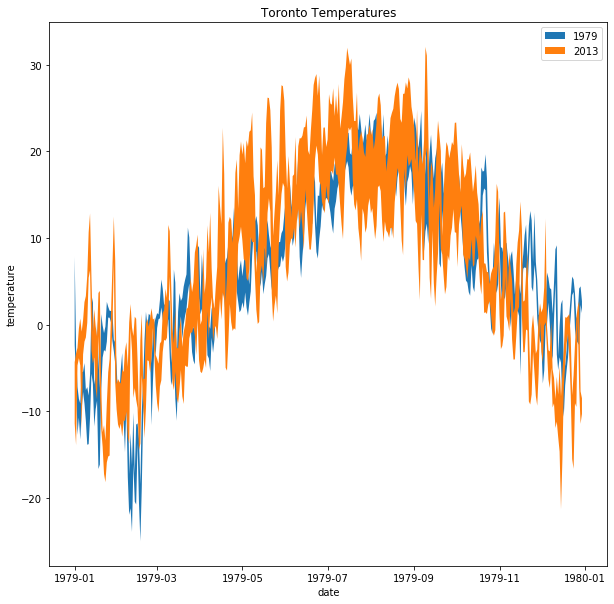

In [262]:
fig, ax = plt.subplots(figsize=(10,10))
ax.fill_between(toronto1979["date"], toronto1979["max"], toronto1979["min"], label='1979')
ax.fill_between(toronto1979["date"], toronto2013["max"], toronto2013["min"], label = '2013')
ax.set_title('Toronto Temperatures')
ax.set_xlabel('date')
ax.set_ylabel('temperature')
plt.legend(loc='top right')

In [263]:
max_temps = toronto.sort_values(by = "max", ascending = False)
#toronto.sort_values(by = "max", ascending = False, inplace = True)

In [264]:
max_temps[["date","max"]].head

<bound method NDFrame.head of             date     max
12242 2012-07-17  36.991
11880 2011-07-21  36.717
12231 2012-07-06  35.436
12248 2012-07-23  34.494
12260 2012-08-04  34.191
...          ...     ...
43    1979-02-13 -17.209
39    1979-02-09 -17.299
5484  1994-01-15 -17.559
12781 2014-01-07 -17.974
47    1979-02-17 -18.446

[12987 rows x 2 columns]>

In [265]:
monthly = toronto.groupby([toronto['date'].dt.year, toronto['date'].dt.month]).mean()

In [266]:
monthly.describe

<bound method NDFrame.describe of                  max        min
date date                      
1979 1     -2.634742  -7.506710
     2     -7.118679 -12.453214
     3      3.469226  -1.135548
     4      5.817033   1.756767
     5      9.781645   5.690194
...              ...        ...
2014 3     -1.192419  -9.389065
     4     10.694400   0.312933
     5     17.972774   7.420710
     6     23.271500  11.153933
     7     23.063097  12.323419

[427 rows x 2 columns]>

In [267]:
toronto1979 = monthly.loc[1979]["max"]
toronto1989 = monthly.loc[1989]["max"]
toronto1999 = monthly.loc[1999]["max"]
toronto2009 = monthly.loc[2009]["max"]

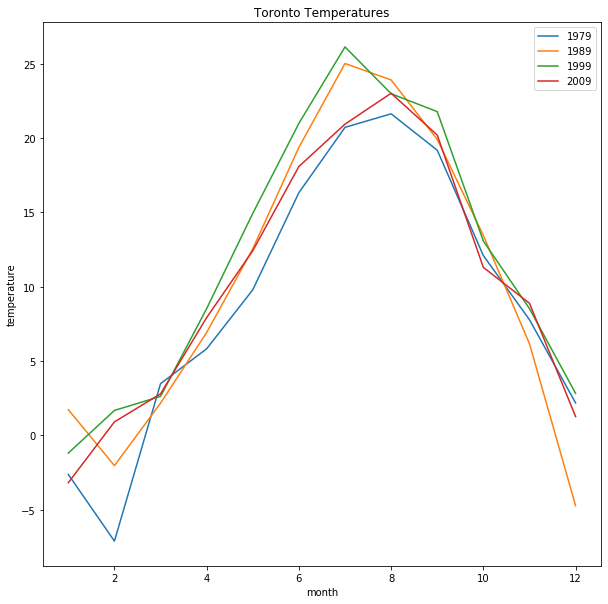

In [233]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(toronto1979, label='1979')
ax.plot(toronto1989, label='1989')
ax.plot(toronto1999, label='1999')
ax.plot(toronto2009, label='2009')
ax.set_title('Toronto Temperatures')
ax.set_xlabel('month')
ax.set_ylabel('temperature')
ax.legend()